# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Erwin Durasow

Datum: 11.11.2023

Gruppe: 79

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Inwieweit bestätigt die Analyse der thermischen Verluste (bzw die Wärmekonvektion zwischen Wasser und Luft) eines heißen Getränks über einen längeren Zeitraum, insbesondere durch die Bestimmung des Transportkoeffizienten, das Newtonsche Abkühlungsgesetz?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/Newton_Aufbau.jpeg" width="800">

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
data_path = "data/data_newton/data_newton.h5"

# DONE #

In [14]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
with h5py.File(data_path, 'r') as file:
        # Read attributes from the root of the HDF5 file
        raw_data_group = file["RawData"]
        attributes = {
            'authors': file.attrs.get('authors', "Unknown"),
            'created': file.attrs.get('created', 'Unknown'),
            'experiment': file.attrs.get('experiment', 'Unknown'),
            'groupNumber': file.attrs.get('group_number', 'Unknown'),
        }
        temperature_data = []
        timestamp_data = []
        uuid_list = []
        names_list = []
        
        # Read experimental data from the 'RawData' group
        for i, uuid in enumerate(raw_data_group):
            uuid_group = raw_data_group[uuid]
            print(dict(raw_data_group))
            uuid_list.append(uuid)
            names_list.append(uuid_group.attrs.get("name"))
            # Read attributes from the UUID sensor group
            uuid_attributes = {
                'name': uuid_group.attrs.get('name', 'Unknown'),
                'serial_number': uuid_group.attrs.get('serial_number', 'Unknown'),
                'Unit': uuid_group['temperature'].attrs.get("Unit")
            }
            print(f"\nUUID: {uuid}")
            print("Sensor Attributes:", uuid_attributes)
          
            # Read temperature and timestamp datasets
            temperature_data.append(list(uuid_group['temperature'][:]))
            timestamp_data.append(list(uuid_group['timestamp'][:]))
            print(list(uuid_group['temperature'][:])[20])
            print(list(uuid_group['timestamp'][:])[-1])
if len(temperature_data[0])>len(temperature_data[1]):
    del temperature_data[0][-1]
    del timestamp_data[0][-1]
elif len(temperature_data[0])<len(temperature_data[1]):
    del temperature_data[1][-1]
    del timestamp_data[1][-1]
log_temperature_differences = [np.log(T_cup - T_enviroment) for T_cup, T_enviroment in zip(temperature_data[0], temperature_data[1])]
# DONE #

{'1ee80933-b1de-6061-95bf-7315bfd3f80f': <HDF5 group "/RawData/1ee80933-b1de-6061-95bf-7315bfd3f80f" (2 members)>, '1ee80935-9058-68c6-9ead-cef58130afc6': <HDF5 group "/RawData/1ee80935-9058-68c6-9ead-cef58130afc6" (2 members)>}

UUID: 1ee80933-b1de-6061-95bf-7315bfd3f80f
Sensor Attributes: {'name': ' sensor_temperature_cup', 'serial_number': '3ce10457bbc6', 'Unit': None}
63.375
634.8011648654938
{'1ee80933-b1de-6061-95bf-7315bfd3f80f': <HDF5 group "/RawData/1ee80933-b1de-6061-95bf-7315bfd3f80f" (2 members)>, '1ee80935-9058-68c6-9ead-cef58130afc6': <HDF5 group "/RawData/1ee80935-9058-68c6-9ead-cef58130afc6" (2 members)>}

UUID: 1ee80935-9058-68c6-9ead-cef58130afc6
Sensor Attributes: {'name': 'sensor_ temperature_cup or temperature_environment', 'serial_number': '3ce1e380b212', 'Unit': None}
25.875
634.0011556148529


#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


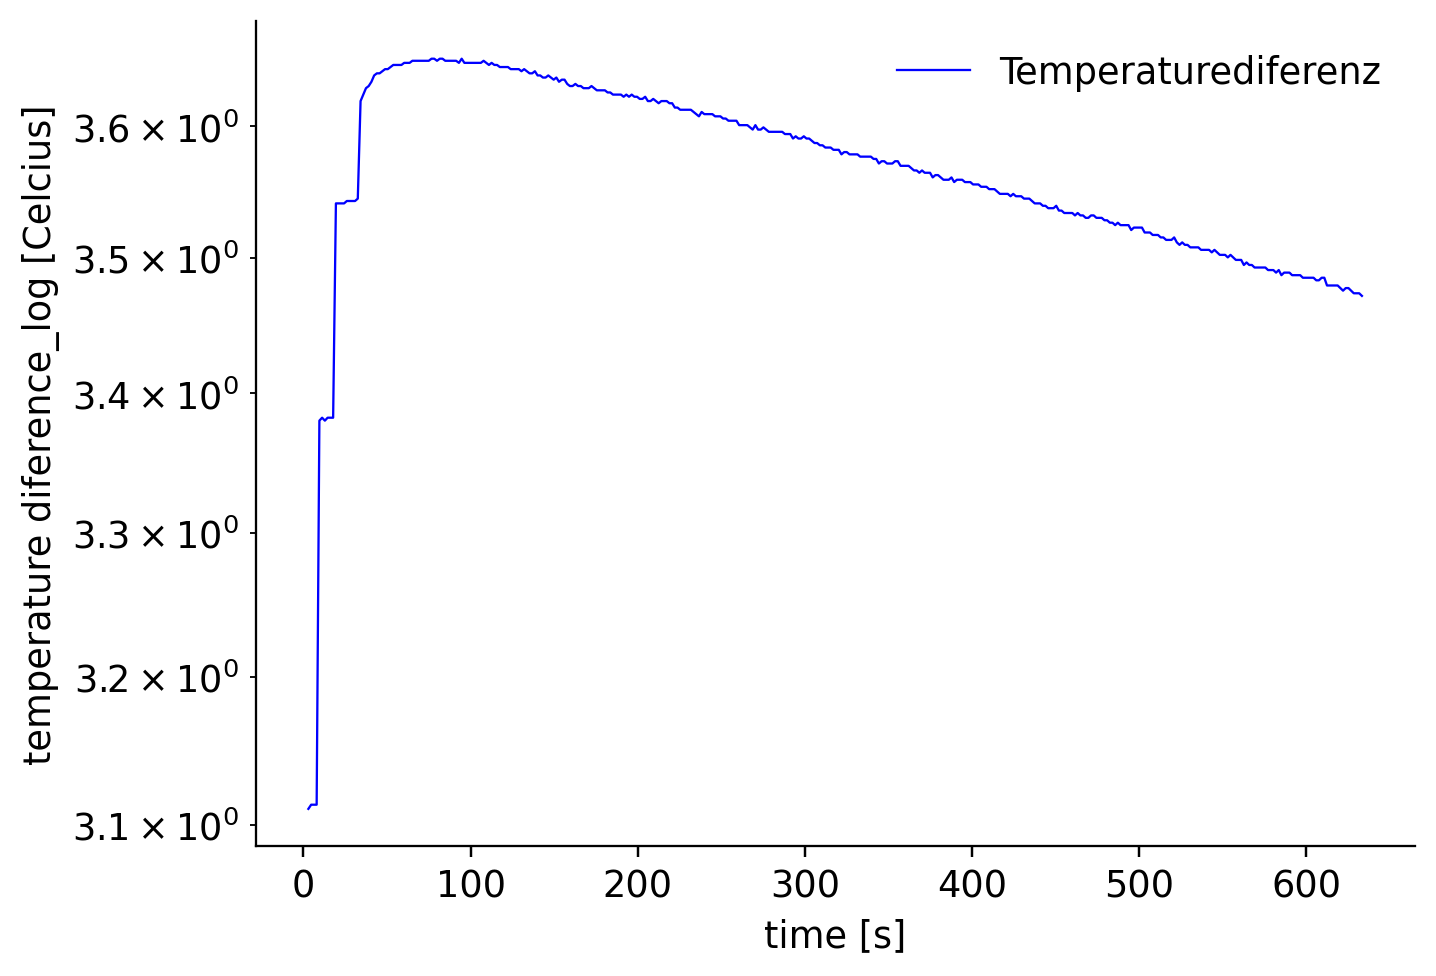

In [5]:
# TODO: Use the temperature and time data for plotting
#fig, axes = plt.subplot(1, figsize=(12, 8))
#fig.suptitle('Temperaturdifferenz der Temperatur der Tasse und der Umgebungstemperatur', fontsize = 18)

plt.semilogy(timestamp_data[0], log_temperature_differences, color='b', label="Temperaturediferenz")

# Configure the plot
plt.xlabel('time [s]')
plt.ylabel("temperature diference_log  [Celcius]")
plt.legend()

# Farben für die Balken
colors = ['b']  # Blau 

# Anzeigen der Subplots
plt.tight_layout()

# Speichern des Diagramms als SVG-Datei
plt.savefig('figures/temperature_newton.svg')

plt.show()

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [6]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
coefficients = np.polyfit(timestamp_data[0], log_temperature_differences/np.log(temperature_data[0][20]-temperature_data[1][20]), 1)
K = coefficients[0]
# DONE #

#### (iV) Ergebnis

In [7]:
# TODO: Print result
print("The measured and calculated coefficient of the Newton's law of cooling is ",K , "1/s" )

# DONE #

The measured and calculated coefficient of the Newton's law of cooling is  -5.3765983242608085e-05 1/s


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Der semilogaritmische Plot sugeriert einen linearen Zusammenhang zwischen der Logaritmischen Temperaturdifferenz und der Zeit. Bis zur 100ten Sekunde sind Ausreißer zu erkennen die dadurch zu erklären sind, dass das Experiment gestartet wurde bevor der Sensor im heißen Wasser lag. Der berechnete Koeffizient K im Newtonschen Abkühlgesetzt liegt erwarteten kleinen negativen Bereich.  

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Das Experiment zum Newtonschen Abkühlungsgesetz hat faszinierende Ergebnisse geliefert, die Einblicke in das Abkühlverhalten von Objekten im Verlauf der Zeit ermöglichen. Die gewonnenen Erkenntnisse sind beeindruckend und bieten einen tieferen Einblick in die Physik der Wärmeübertragung.

Allerdings hege ich Zweifel hinsichtlich der praktischen Umsetzbarkeit des Fairdata-Prinzips in der Industrie, da es einen erheblichen Mehraufwand mit sich bringt. Die Idee, Daten fair und transparent zu teilen, ist lobenswert und könnte zu einer verbesserten Zusammenarbeit und innovativen Entwicklungen führen. Dennoch stellt sich die Frage, ob die Industrie bereit ist, die zusätzlichen Ressourcen und den Mehraufwand für die Implementierung dieses Prinzips aufzubringen.